In [1]:
import zipfile
import os



In [2]:
# Step 1: Extract the zip file
# Create a directory for extraction
extract_dir = "/content/train"
os.makedirs(extract_dir, exist_ok=True)

# Open and extract the zip file
with zipfile.ZipFile("train.zip", 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Contents extracted to {extract_dir}")

Contents extracted to /content/train


In [3]:
# Step 3: Extract the zip file
# Create a directory for extraction
extract_dir = "/content/test"
os.makedirs(extract_dir, exist_ok=True)

# Open and extract the zip file
with zipfile.ZipFile("test.zip", 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Contents extracted to {extract_dir}")

Contents extracted to /content/test


In [4]:
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

In [5]:


# Step 1: Load an image
image_path = "/content/train/train/cycling/Image_11.jpg"  # Replace with your image path
original_image = Image.open(image_path)  # Open the image



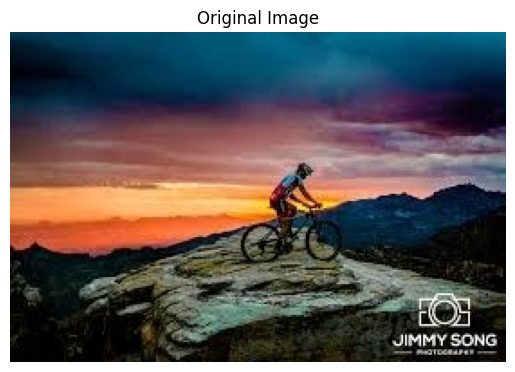

In [6]:
# Step 2: Show the original and processed images

plt.imshow(original_image)
plt.title("Original Image")
plt.axis("off")
plt.show()

In [7]:
# Get the dimensions
width, height = original_image.size  # .size returns (width, height)

print(f"Original Image Dimensions: {width} x {height} pixels")

Original Image Dimensions: 275 x 183 pixels


In [8]:
# Step 3: Define the processing steps
transform = transforms.Compose([
    transforms.Resize((128,128)),  # Make the image smaller (64x64 pixels)
    transforms.ToTensor(),       # Convert the image into numbers (tensor)
    #transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.2, 0.2, 0.2])

])




In [9]:
# Step 3: Apply the processing steps to the image
processed_image = transform(original_image)  # Process the image



In [14]:
processed_image

tensor([[[0.0196, 0.0196, 0.0196,  ..., 0.0157, 0.0196, 0.0235],
         [0.0157, 0.0157, 0.0118,  ..., 0.0078, 0.0157, 0.0196],
         [0.0078, 0.0078, 0.0039,  ..., 0.0078, 0.0078, 0.0078],
         ...,
         [0.0039, 0.0078, 0.0118,  ..., 0.0745, 0.0471, 0.0353],
         [0.0039, 0.0078, 0.0118,  ..., 0.0667, 0.0549, 0.0431],
         [0.0039, 0.0078, 0.0118,  ..., 0.0745, 0.0745, 0.0588]],

        [[0.2314, 0.2353, 0.2392,  ..., 0.4392, 0.4353, 0.4314],
         [0.2118, 0.2118, 0.2196,  ..., 0.4275, 0.4275, 0.4314],
         [0.1765, 0.1765, 0.1843,  ..., 0.4118, 0.4157, 0.4196],
         ...,
         [0.0039, 0.0078, 0.0118,  ..., 0.0431, 0.0196, 0.0157],
         [0.0039, 0.0078, 0.0118,  ..., 0.0353, 0.0314, 0.0235],
         [0.0039, 0.0078, 0.0118,  ..., 0.0471, 0.0471, 0.0392]],

        [[0.3137, 0.3176, 0.3294,  ..., 0.5686, 0.5686, 0.5686],
         [0.2941, 0.2980, 0.3020,  ..., 0.5569, 0.5569, 0.5608],
         [0.2510, 0.2588, 0.2667,  ..., 0.5373, 0.5373, 0.

In [11]:
# Convert the processed image back to a format we can display
processed_image_for_display = processed_image.permute(1,2,0).numpy()  # Rearrange for display

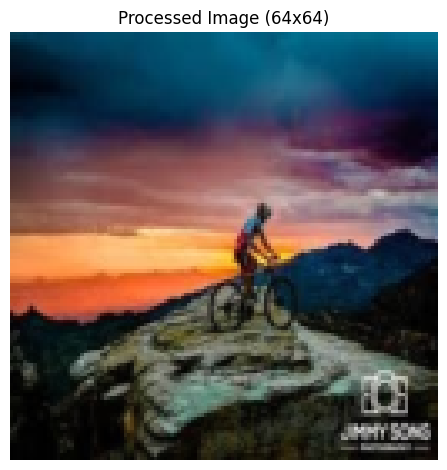

In [15]:
# Processed image (smaller and converted for computer)
plt.imshow(processed_image_for_display)
plt.title("Processed Image (64x64)")
plt.axis("off")

plt.tight_layout()
plt.show()


In [91]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [92]:
# Step 1: Data Preparation
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize all images to 64x64
    transforms.ToTensor(),        # Convert to tensor
    transforms.Normalize((0.5,0.5,0.5), (0.2,0.2,0.2))  # Normalize to [-1, 1]
])

# Load training
train_dataset = datasets.ImageFolder(root="/content/train/train", transform=transform)


train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)




In [93]:
# Step 2: Define CNN
model = nn.Sequential(
    nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),  # Conv layer 1
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),                 # Pooling

    nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),  # Conv layer 2
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),

    nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),  # Conv layer 3
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),

    nn.Flatten(),  # Flatten the 3D tensor into a 1D vector
    nn.Linear(64 * 8 * 8, 128),  # Fully connected layer
    nn.ReLU(),
    nn.Linear(128, 5),           # Output layer for 5 classes
    nn.Softmax()            # Apply Softmax for multiclass probabilities
)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)



In [94]:
# Step 3: Train the Model
epochs = 5
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    total = 0
    correct = 0

    for images, labels in train_loader:
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track the loss and accuracy
        running_loss += loss.item()
        prob, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = 100 * correct / total
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%')







Epoch [1/5], Loss: 1.6570, Accuracy: 20.00%
Epoch [2/5], Loss: 1.5958, Accuracy: 20.00%
Epoch [3/5], Loss: 1.5715, Accuracy: 40.00%
Epoch [4/5], Loss: 1.5029, Accuracy: 60.00%
Epoch [5/5], Loss: 1.3002, Accuracy: 100.00%


In [95]:
# Step 4: Test on a Single Image
# Load a single image
image_path = "/content/test/test/eating/Image_11002.jpg"  # Replace with the path to your image
image = Image.open(image_path)
image = transform(image).unsqueeze(0)  # Apply transformations and add batch dimension



In [96]:
# Perform inference
model.eval()
with torch.no_grad():
    output = model(image)
    predicted_class = torch.argmax(output,1).item()
    probabilities = output[0].tolist()  # Extract probabilities for each class



In [97]:
probabilities

[0.10242369771003723,
 0.24532391130924225,
 0.02922571636736393,
 0.4770817160606384,
 0.14594502747058868]

In [98]:
class_names = train_dataset.classes
print(class_names)

['cycling', 'dancing', 'drinking', 'eating', 'sitting']


Predicted Class: eating
Class Probabilities: {'cycling': 0.10242369771003723, 'dancing': 0.24532391130924225, 'drinking': 0.02922571636736393, 'eating': 0.4770817160606384, 'sitting': 0.14594502747058868}


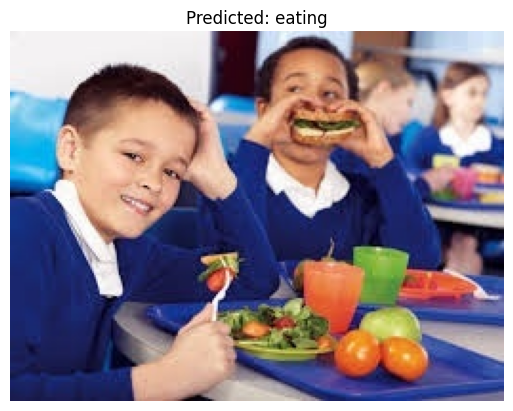

In [99]:
# Get class names
class_names = train_dataset.classes
print(f"Predicted Class: {class_names[predicted_class]}")
print(f"Class Probabilities: {dict(zip(class_names, probabilities))}")

# Display the image with prediction
plt.imshow(Image.open(image_path))
plt.title(f"Predicted: {class_names[predicted_class]}")
plt.axis("off")
plt.show()
